Moringa School Data Science Core Program\
Part-Time 05 Cohort\
Capstone Projcet

The Team:
1. [Richard Gachiri](https://github.com/Rgmoogachiri)
2. [Emmanuellar Karisa](https://github.com/EllahSidi)
3. [Laura Mutheu](https://github.com/LauraMutheu)
4. Daniel Muriithi
5. Alice Nyamngo
6. Chepkemoi Ruto

### Business Understanding:

In the fast-paced world of finance, timely access to real-time stock market data is essential for making well-informed decisions, crafting effective strategies, and managing risks. This data wealth offers a unique opportunity to develop predictive models capable of forecasting stock prices, spotting emerging trends, and providing actionable insights to empower investors and traders.

Our proposal introduces a comprehensive data science project designed to harness real-time stock market data for constructing predictive models. By leveraging sophisticated machine learning techniques and advanced data analysis methodologies, our project aims to bridge the gap between raw data and strategic decision-making. We believe that by providing stakeholders in the financial sector with robust predictive tools, we can help them navigate the intricate landscape of the stock market more effectively.

This proposal outlines a structured approach to utilizing real-time stock market data, including data collection, preprocessing, feature engineering, model development, and rigorous evaluation. Through the collaborative efforts of multidisciplinary teams, combined with our commitment to innovation and excellence, we aspire to redefine the boundaries of predictive analytics in finance. Our goal is to create value, manage risks, and foster sustainable growth within the financial ecosystem.



## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandas import Series
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from prophet import Prophet

## Load Data

In [2]:
stocks_df = pd.read_excel("Data/update_stock_data.xlsx", index_col = 0)
stocks_df.head()

,close,high,low,open,priceDate,symbol,volume,id,key,subkey,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,Name
2022-01-03,182.01,182.88,177.71,177.83,2022-01-03,AAPL,104701220.0,HISTORICAL_PRICES,AAPL,NaN,...,104701220,175.358163,179.480061,180.337968,175.239831,104701220.0,2022-01-03,4.44,0.0250,Apple Inc.
2022-01-04,179.70,182.94,179.12,182.63,2022-01-04,AAPL,99310438.0,HISTORICAL_PRICES,AAPL,NaN,...,99310438,180.091443,177.202170,180.397134,176.630232,99310438.0,2022-01-04,-2.31,-0.0127,Apple Inc.
2022-01-05,174.92,180.17,174.64,179.61,2022-01-05,AAPL,94537602.0,HISTORICAL_PRICES,AAPL,NaN,...,94537602,177.113421,172.488612,177.665637,172.212504,94537602.0,2022-01-05,-4.78,-0.0266,Apple Inc.
2022-01-06,172.00,175.30,171.64,172.70,2022-01-06,AAPL,96903955.0,HISTORICAL_PRICES,AAPL,NaN,...,96903955,170.299470,169.609200,172.863330,169.254204,96903955.0,2022-01-06,-2.92,-0.0167,Apple Inc.
2022-01-07,172.17,174.14,171.03,172.89,2022-01-07,AAPL,86709147.0,HISTORICAL_PRICES,AAPL,NaN,...,86709147,170.486829,169.776837,171.719454,168.652683,86709147.0,2022-01-07,0.17,0.0010,Apple Inc.


In [3]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10509 entries, 2022-01-03 to 2022-12-30
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   close                 10509 non-null  float64       
 1   high                  10509 non-null  float64       
 2   low                   10509 non-null  float64       
 3   open                  10509 non-null  float64       
 4   priceDate             10509 non-null  datetime64[ns]
 5   symbol                10509 non-null  object        
 6   volume                10509 non-null  float64       
 7   id                    10509 non-null  object        
 8   key                   10509 non-null  object        
 9   subkey                0 non-null      float64       
 10  updated               10509 non-null  float64       
 11  changeOverTime        10509 non-null  float64       
 12  marketChangeOverTime  10509 non-null  float64       
 13 

In [4]:
stocks_df.describe()

,close,high,low,open,priceDate,volume,subkey,updated,changeOverTime,marketChangeOverTime,...,uLow,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent
count,10509.000000,10509.000000,10509.000000,10509.000000,10509,1.050900e+04,0.0,1.050900e+04,10509.000000,10509.000000,...,10509.000000,1.050900e+04,10509.000000,10509.000000,10509.000000,10509.000000,1.050900e+04,10509,10509.000000,10509.000000
mean,223.485346,227.252650,219.847448,223.738443,2022-06-30 12:05:32.971738624,2.922589e+07,NaN,1.712387e+12,0.850805,0.850805,...,327.361217,2.455677e+07,161.398618,161.268858,163.939047,158.671194,2.922589e+07,2022-06-30 12:05:32.971738624,-0.925026,-0.001275
min,25.040000,25.480000,24.590000,24.725000,2022-01-03 00:00:00,1.197767e+06,NaN,1.659625e+12,-0.955650,-0.955650,...,24.590000,7.458600e+05,23.770615,24.073456,24.496472,23.640826,1.197767e+06,2022-01-03 00:00:00,-2322.210000,-0.949000
25%,96.310000,98.230000,95.030000,96.520000,2022-03-31 00:00:00,7.624161e+06,NaN,1.713002e+12,-0.111187,-0.111187,...,95.030000,6.448739e+06,83.120000,83.139342,84.820000,81.765450,7.624161e+06,2022-03-31 00:00:00,-2.050000,-0.015000
50%,147.630000,149.675000,145.522505,147.470000,2022-06-29 00:00:00,1.893468e+07,NaN,1.713002e+12,0.233579,0.233579,...,154.950000,1.541502e+07,140.900500,140.489334,142.607750,138.797000,1.893468e+07,2022-06-29 00:00:00,-0.130000,-0.001300
75%,231.840000,236.600000,226.420000,231.300000,2022-09-29 00:00:00,3.991910e+07,NaN,1.713002e+12,0.483837,0.483837,...,265.610000,3.272002e+07,220.945000,221.420000,225.750000,216.350000,3.991910e+07,2022-09-29 00:00:00,1.660000,0.012500
max,3408.090000,3428.000000,3357.370000,3408.760000,2022-12-30 00:00:00,2.732081e+08,NaN,1.713003e+12,21.506579,21.506579,...,3357.370000,2.231334e+08,605.610000,597.370000,609.990000,590.560000,2.732081e+08,2022-12-30 00:00:00,375.880000,0.367600
std,400.097648,407.336922,393.242690,401.052866,NaN,2.963628e+07,NaN,4.184407e+09,3.022659,3.022659,...,594.171843,2.628159e+07,105.304724,105.077810,107.072277,103.192552,2.963628e+07,NaN,35.270362,0.030460


In [5]:
stocks_df.shape

(10509, 27)

In [6]:
stocks_df.dtypes

close                          float64
high                           float64
low                            float64
open                           float64
priceDate               datetime64[ns]
symbol                          object
volume                         float64
id                              object
key                             object
subkey                         float64
updated                        float64
changeOverTime                 float64
marketChangeOverTime           float64
uOpen                          float64
uClose                         float64
uHigh                          float64
uLow                           float64
uVolume                          int64
fOpen                          float64
fClose                         float64
fHigh                          float64
fLow                           float64
fVolume                        float64
label                   datetime64[ns]
change                         float64
changePercent            

## Data Cleaning 

Data cleaning is an essential step in preparing the stocks_df dataset for analysis and modeling. This process involves identifying and rectifying inconsistencies, errors, and missing values in the dataset to ensure its accuracy, reliability, and suitability for further analysis.

The importance of data cleaning is to ensure: 
* Accuracy.
* Completeness.
* Consistency.
* Validity.
* Uniforminity.

In [7]:
stocks_df.isna().sum()

close                       0
high                        0
low                         0
open                        0
priceDate                   0
symbol                      0
volume                      0
id                          0
key                         0
subkey                  10509
updated                     0
changeOverTime              0
marketChangeOverTime        0
uOpen                       0
uClose                      0
uHigh                       0
uLow                        0
uVolume                     0
fOpen                       0
fClose                      0
fHigh                       0
fLow                        0
fVolume                     0
label                       0
change                      0
changePercent               0
Name                        0
dtype: int64

In [8]:
def missing_values(data):
    # identify the total missing values per column
    # sort in order
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe
    missing = pd.DataFrame({"Missing Values": miss, "Percentage": percentage_miss}).reset_index()

    # remove values that are missing
    missing.drop(missing[missing["Percentage"] == 0].index, inplace = True)

    return missing

In [9]:
missing_data = missing_values(stocks_df)
missing_data

,index,Missing Values,Percentage
0,subkey,10509,1.0


In [10]:
stocks_df = stocks_df.drop('subkey', axis = 1)
stocks_df.isna().sum()

close                   0
high                    0
low                     0
open                    0
priceDate               0
symbol                  0
volume                  0
id                      0
key                     0
updated                 0
changeOverTime          0
marketChangeOverTime    0
uOpen                   0
uClose                  0
uHigh                   0
uLow                    0
uVolume                 0
fOpen                   0
fClose                  0
fHigh                   0
fLow                    0
fVolume                 0
label                   0
change                  0
changePercent           0
Name                    0
dtype: int64

In [11]:
## set priceDate  as index
stocks_df.set_index('priceDate', inplace = True)

In [12]:
stocks_df.index

DatetimeIndex(['2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06',
               '2022-01-07', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14',
               ...
               '2022-12-16', '2022-12-19', '2022-12-20', '2022-12-21',
               '2022-12-22', '2022-12-23', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', name='priceDate', length=10509, freq=None)

### Consistency

For the data to be constisten, I need to resolve any inconsistenices by checking for duplicatie values in our data

In [13]:
# checking for duplicates
print(f'The data has {stocks_df.duplicated().sum()} duplicates')

The data has 3874 duplicates


In [14]:
stocks_df.drop_duplicates(inplace=True)
print(f'The data has {stocks_df.duplicated().sum()} duplicates removed.')
 

The data has 0 duplicates removed.


In [15]:
stocks_df.shape

(6635, 25)

### Validity

In [16]:
stocks_df.head()

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,uVolume,fOpen,fClose,fHigh,fLow,fVolume,label,change,changePercent,Name
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,182.01,182.88,177.71,177.83,AAPL,104701220.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.086433,...,104701220,175.358163,179.480061,180.337968,175.239831,104701220.0,2022-01-03,4.44,0.0250,Apple Inc.
2022-01-04,179.70,182.94,179.12,182.63,AAPL,99310438.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.098027,...,99310438,180.091443,177.202170,180.397134,176.630232,99310438.0,2022-01-04,-2.31,-0.0127,Apple Inc.
2022-01-05,174.92,180.17,174.64,179.61,AAPL,94537602.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.122020,...,94537602,177.113421,172.488612,177.665637,172.212504,94537602.0,2022-01-05,-4.78,-0.0266,Apple Inc.
2022-01-06,172.00,175.30,171.64,172.70,AAPL,96903955.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.136676,...,96903955,170.299470,169.609200,172.863330,169.254204,96903955.0,2022-01-06,-2.92,-0.0167,Apple Inc.
2022-01-07,172.17,174.14,171.03,172.89,AAPL,86709147.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.135823,...,86709147,170.486829,169.776837,171.719454,168.652683,86709147.0,2022-01-07,0.17,0.0010,Apple Inc.


Every columns is accurate and appropriate for this analysis

### Uniformity

- I have to make sure that each column is accurate and convert them to the proper data type in order for our data to be consistent.


In [17]:
## Data Types
stocks_df.dtypes

close                          float64
high                           float64
low                            float64
open                           float64
symbol                          object
volume                         float64
id                              object
key                             object
updated                        float64
changeOverTime                 float64
marketChangeOverTime           float64
uOpen                          float64
uClose                         float64
uHigh                          float64
uLow                           float64
uVolume                          int64
fOpen                          float64
fClose                         float64
fHigh                          float64
fLow                           float64
fVolume                        float64
label                   datetime64[ns]
change                         float64
changePercent                  float64
Name                            object
dtype: object

## Data Preprocessing

### Feature Engineering

In [18]:
# 1. Extract date-time features
stocks_df['day_of_week'] = stocks_df.index.dayofweek
stocks_df['month'] = stocks_df.index.month
stocks_df['quarter'] = stocks_df.index.quarter
stocks_df['year'] = stocks_df.index.year

print(stocks_df[['day_of_week', 'month', 'quarter', 'year']].head())

            day_of_week  month  quarter  year
priceDate                                    
2022-01-03            0      1        1  2022
2022-01-04            1      1        1  2022
2022-01-05            2      1        1  2022
2022-01-06            3      1        1  2022
2022-01-07            4      1        1  2022


**Moving averages to highlight longer-term trends or cycles in the data**.

In [19]:
# 2. Calculate moving averages
stocks_df['7_day_ma'] = stocks_df['close'].rolling(window=7).mean()
stocks_df['30_day_ma'] = stocks_df['close'].rolling(window=30).mean()

Volatility measures will help quantify the degree of variation in the price over time

In [20]:
# 3. Calculate volatility measures
stocks_df['close_std'] = stocks_df['close'].rolling(window=7).std()

#### Relative Strength Index (RSI)

In [21]:
# 4. Calculate RSI
def calculate_rsi(series, window=14):
    delta = series.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

stocks_df['rsi'] = calculate_rsi(stocks_df['close'])

Create lag features to represent the past values of that variable over a specified time period.

In [22]:
# 5. Create lag features
stocks_df['close_lag_1'] = stocks_df['close'].shift(1)
stocks_df['close_lag_7'] = stocks_df['close'].shift(7)

In [23]:
# 6. Calculate percentage change
stocks_df['close_pct_change'] = stocks_df['close'].pct_change()

In [24]:
# Display the modified DataFrame
stocks_df.head()

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,month,quarter,year,7_day_ma,30_day_ma,close_std,rsi,close_lag_1,close_lag_7,close_pct_change
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,182.01,182.88,177.71,177.83,AAPL,104701220.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.086433,...,1,1,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,179.70,182.94,179.12,182.63,AAPL,99310438.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.098027,...,1,1,2022,NaN,NaN,NaN,NaN,182.01,NaN,-0.012692
2022-01-05,174.92,180.17,174.64,179.61,AAPL,94537602.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.122020,...,1,1,2022,NaN,NaN,NaN,NaN,179.70,NaN,-0.026600
2022-01-06,172.00,175.30,171.64,172.70,AAPL,96903955.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.136676,...,1,1,2022,NaN,NaN,NaN,NaN,174.92,NaN,-0.016693
2022-01-07,172.17,174.14,171.03,172.89,AAPL,86709147.0,HISTORICAL_PRICES,AAPL,1.713001e+12,-0.135823,...,1,1,2022,NaN,NaN,NaN,NaN,172.00,NaN,0.000988


In [25]:
missing_data = missing_values(stocks_df)
missing_data

,index,Missing Values,Percentage
0,30_day_ma,29,0.004371
1,rsi,13,0.001959
2,close_lag_7,7,0.001055
3,close_std,6,0.000904
4,7_day_ma,6,0.000904
5,close_pct_change,1,0.000151
6,close_lag_1,1,0.000151


They are missing values in the following columns:

- 7_day_ma
- 30_day_ma
- close_std
- rsi
- close_lag_1
- close_lag_7
- close_pct_change

The percentage of missing values in the above columns is very low. Therefore, the rows with missing values can b dropped.
dropped.
 
            1

In [26]:
# Drop rows with missing values in specified columns
columns_with_missing = ['7_day_ma', '30_day_ma', 'close_std', 'rsi', 'close_lag_1', 'close_lag_7', 'close_pct_change']
stocks_df.dropna(subset=columns_with_missing, inplace=True)

In [27]:
stocks_df.isna().sum()

close                   0
high                    0
low                     0
open                    0
symbol                  0
volume                  0
id                      0
key                     0
updated                 0
changeOverTime          0
marketChangeOverTime    0
uOpen                   0
uClose                  0
uHigh                   0
uLow                    0
uVolume                 0
fOpen                   0
fClose                  0
fHigh                   0
fLow                    0
fVolume                 0
label                   0
change                  0
changePercent           0
Name                    0
day_of_week             0
month                   0
quarter                 0
year                    0
7_day_ma                0
30_day_ma               0
close_std               0
rsi                     0
close_lag_1             0
close_lag_7             0
close_pct_change        0
dtype: int64

## Train-test split

In [28]:
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
X = stocks_df.dropna().drop('close', axis=1)  # Exclude 'close' column from features
y = stocks_df.dropna()['close']  # Target variable is 'close' column

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and test sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (5284, 35) (5284,)
Test set shape: (1322, 35) (1322,)


In [29]:
missing_values = stocks_df.isnull().sum()
missing_values

close                   0
high                    0
low                     0
open                    0
symbol                  0
volume                  0
id                      0
key                     0
updated                 0
changeOverTime          0
marketChangeOverTime    0
uOpen                   0
uClose                  0
uHigh                   0
uLow                    0
uVolume                 0
fOpen                   0
fClose                  0
fHigh                   0
fLow                    0
fVolume                 0
label                   0
change                  0
changePercent           0
Name                    0
day_of_week             0
month                   0
quarter                 0
year                    0
7_day_ma                0
30_day_ma               0
close_std               0
rsi                     0
close_lag_1             0
close_lag_7             0
close_pct_change        0
dtype: int64

## Exploratory Data Analysis

In [30]:
# Find the company with the highest stock value in the training set
# Concatenate features from training and test sets
X_concatenated = pd.concat([X_train, X_test], axis=0)

# Concatenate target variable from training and test sets
y_concatenated = pd.concat([y_train, y_test], axis=0)

# Merge features and target variable into a single DataFrame
concatenated_df = pd.concat([X_concatenated, pd.DataFrame({'close': y_concatenated})], axis=1)

# Find the company with the highest stock value
max_stock_value = concatenated_df['close'].max()
company_with_highest_stock = concatenated_df.loc[concatenated_df['close'] == max_stock_value, 'symbol'].iloc[0]

# Print the results
print("Company with the highest stock value across training and test sets:", company_with_highest_stock)
print("Highest stock value:", max_stock_value)


Company with the highest stock value across training and test sets: AMZN
Highest stock value: 3408.09


In [31]:
print(X_train.columns)
print(X_train.head())

Index(['high', 'low', 'open', 'symbol', 'volume', 'id', 'key', 'updated',
       'changeOverTime', 'marketChangeOverTime', 'uOpen', 'uClose', 'uHigh',
       'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh', 'fLow', 'fVolume',
       'label', 'change', 'changePercent', 'Name', 'day_of_week', 'month',
       'quarter', 'year', '7_day_ma', '30_day_ma', 'close_std', 'rsi',
       'close_lag_1', 'close_lag_7', 'close_pct_change'],
      dtype='object')
               high      low    open symbol      volume                 id  \
priceDate                                                                    
2022-05-03  102.690   99.430  100.13   BABA  15216107.0  HISTORICAL_PRICES   
2022-04-12   86.820   85.375   85.71    XOM  22444175.0  HISTORICAL_PRICES   
2022-06-07   63.365   62.220   62.38     KO  17886319.0  HISTORICAL_PRICES   
2022-12-21   64.050   63.070   63.07     KO  10411288.0  HISTORICAL_PRICES   
2022-11-11  159.920  155.580  156.49    CRM   7382476.0  HISTORICAL_PRICES   

   

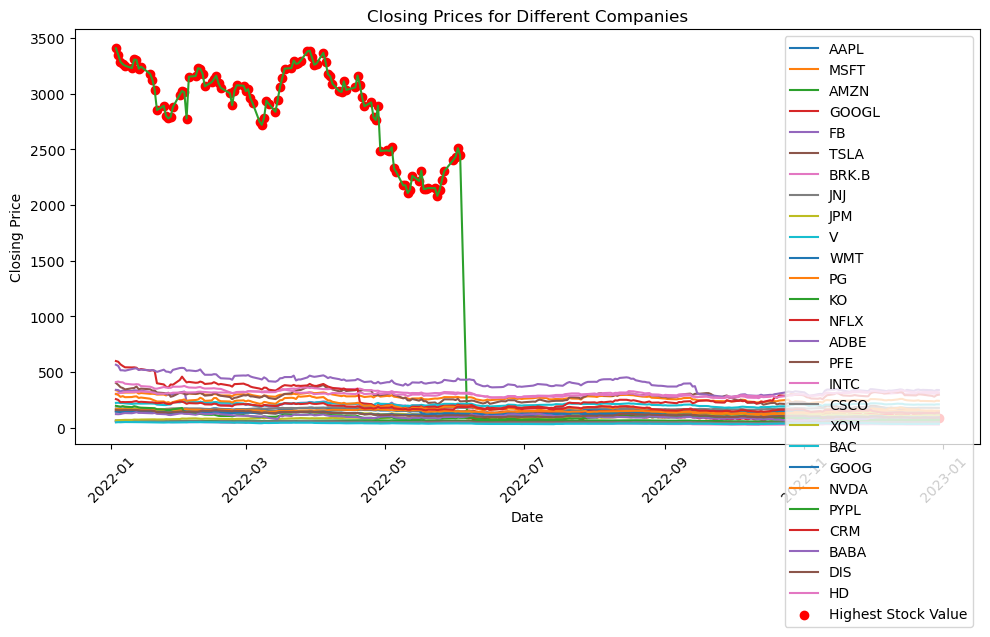

In [32]:
# Find the company with the highest stock value
max_stock_value = stocks_df['close'].max()
company_with_highest_stock = stocks_df.loc[stocks_df['close'] == max_stock_value, 'symbol'].iloc[0]

# Plot closing prices for each company
plt.figure(figsize=(10, 6))
for symbol in stocks_df['symbol'].unique():
    company_data = stocks_df[stocks_df['symbol'] == symbol]
    plt.plot(company_data.index, company_data['close'], label=symbol)

# Highlight the company with the highest stock value
highest_stock_company_data = stocks_df[stocks_df['symbol'] == company_with_highest_stock]
plt.scatter(highest_stock_company_data.index, highest_stock_company_data['close'], color='red', label='Highest Stock Value')

plt.title('Closing Prices for Different Companies')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [33]:
# Sort DataFrame by 'close' column in descending order
sorted_stocks_df = stocks_df.sort_values(by='close', ascending=False)

# Filter out duplicate companies
unique_top_ten_companies = sorted_stocks_df.drop_duplicates(subset='symbol').head(10)

print("Top Ten Companies with Highest Stock Values (No Duplicates):")
print(unique_top_ten_companies[['symbol', 'close']])

Top Ten Companies with Highest Stock Values (No Duplicates):
           symbol        close
priceDate                     
2022-01-03   AMZN  3408.090000
2022-01-03   NFLX   597.370000
2022-01-03   ADBE   564.370000
2022-01-04     HD   412.840000
2022-01-03   TSLA   399.886674
2022-03-28  BRK.B   359.570000
2022-01-03     FB   338.540000
2022-01-03   MSFT   334.750000
2022-01-03   NVDA   301.210000
2022-01-03    CRM   255.460000


##### The top 10 companies with highest stock values

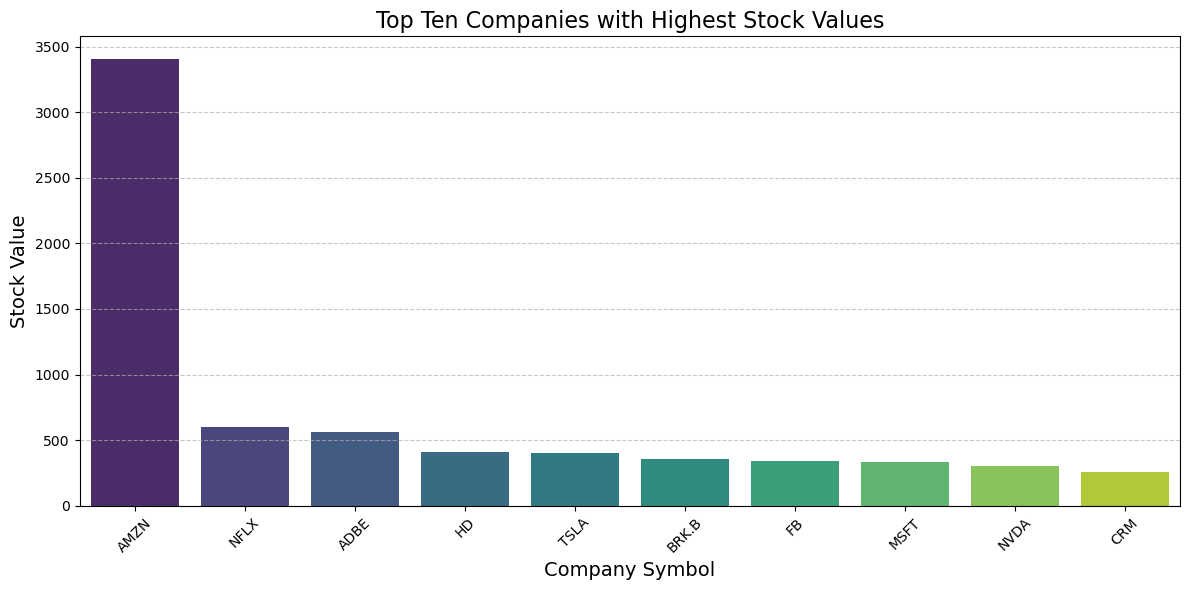

In [34]:
# Sort DataFrame by 'close' column in descending order
sorted_stocks_df = stocks_df.sort_values(by='close', ascending=False)

# Filter out duplicate companies
unique_top_ten_companies = sorted_stocks_df.drop_duplicates(subset='symbol').head(10)

# Plot bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=unique_top_ten_companies, x='symbol', y='close', palette='viridis')
plt.xlabel('Company Symbol', fontsize=14)
plt.ylabel('Stock Value', fontsize=14)
plt.title('Top Ten Companies with Highest Stock Values', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### The top 10 companies with highest RSI

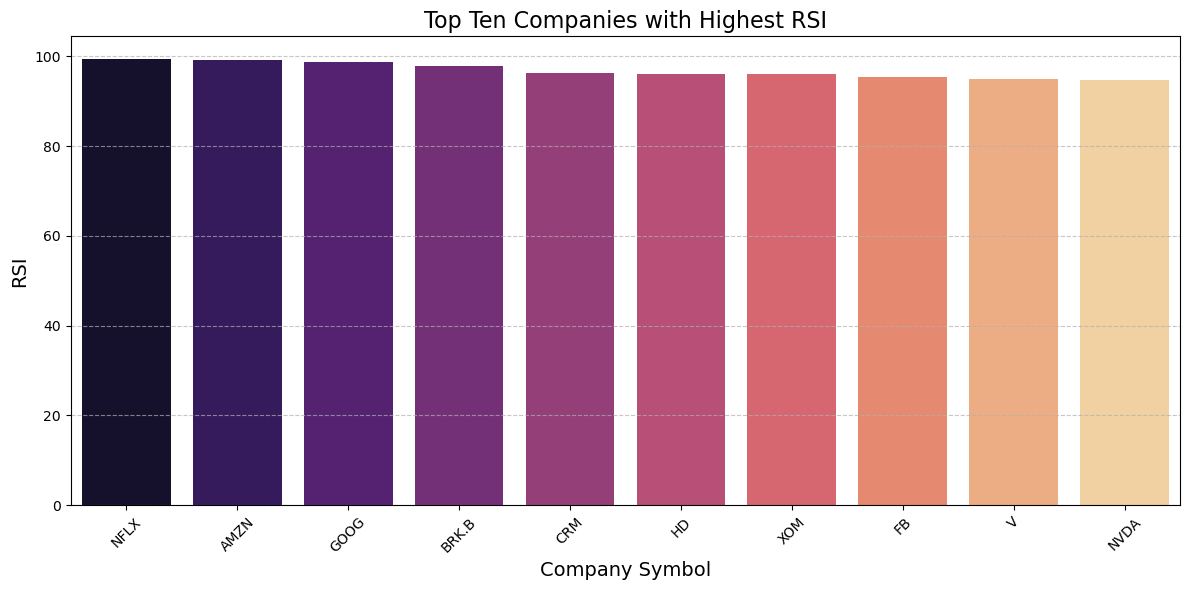

In [35]:
# Sort DataFrame by 'RSI' column in descending order
sorted_stocks_df = stocks_df.sort_values(by='rsi', ascending=False)

# Filter out duplicate companies
unique_top_ten_companies = sorted_stocks_df.drop_duplicates(subset='symbol').head(10)

# Plot bar graph
plt.figure(figsize=(12, 6))
sns.barplot(data=unique_top_ten_companies, x='symbol', y='rsi', palette='magma')
plt.xlabel('Company Symbol', fontsize=14)
plt.ylabel('RSI', fontsize=14)
plt.title('Top Ten Companies with Highest RSI', fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Modelling

### **Time series Decomposition**

We will do the time series decomposition for only **'AMZN'** and **'NFLX'**. Breaking the non-stationary time series into its three components—trend, seasonality, and residuals—is indeed a helpful approach for investigating the pattern in the past and aiding in the forecasting future stock values.

In [36]:
# Extracting stock price data for AMZN and NFLX after the train-test split
#amzn_train_data = y_train[X_train['symbol'] == 'AMZN']
#nflx_train_data = y_train[X_train['symbol'] == 'NFLX']

#amzn_test_data = y_test[X_test['symbol'] == 'AMZN']
#nflx_test_data = y_test[X_test['symbol'] == 'NFLX']

In [37]:
# Step 1: Extract stock price data for AMZN and NFLX
amzn_df = stocks_df[stocks_df['symbol'] == 'AMZN']
nflx_df = stocks_df[stocks_df['symbol'] == 'NFLX']

amzn_data = amzn_df.loc[amzn_df['symbol'] == 'AMZN', 'close']
nflx_data = nflx_df.loc[nflx_df['symbol'] == 'NFLX', 'close']

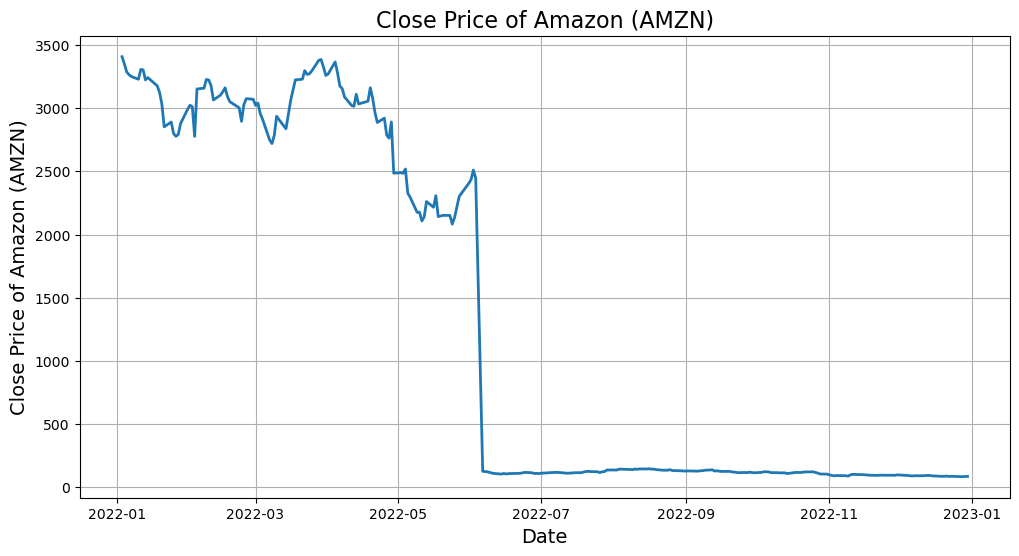

In [38]:
# Plot the raw monthly returns data for AMZN
plt.figure(figsize=(12, 6))
plt.plot(amzn_data, linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price of Amazon (AMZN)', fontsize=14)
plt.title('Close Price of Amazon (AMZN)', fontsize=16)
plt.grid(True)
plt.show()

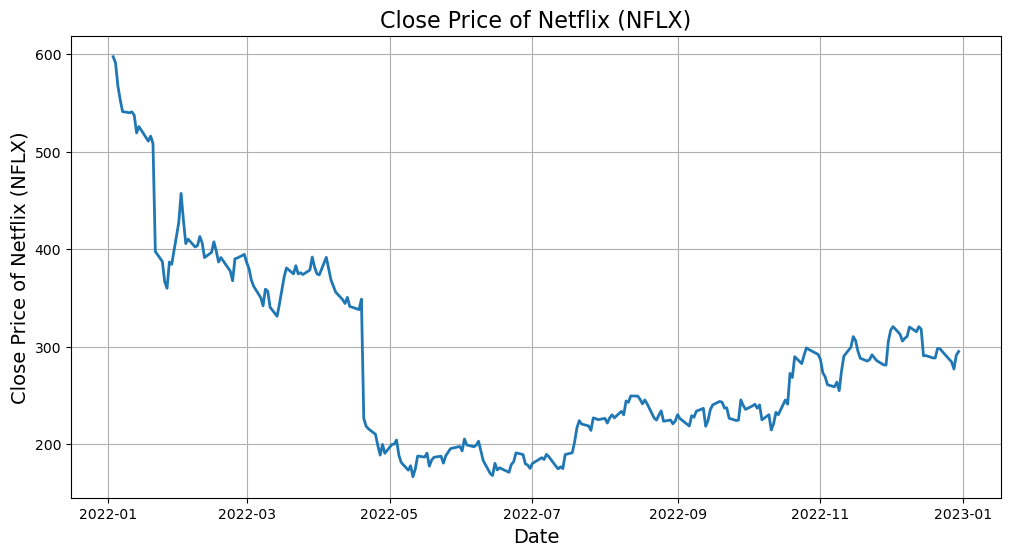

In [39]:
# Plot the raw monthly returns data for AMZN
plt.figure(figsize=(12, 6))
plt.plot(nflx_data, linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Close Price of Netflix (NFLX)', fontsize=14)
plt.title('Close Price of Netflix (NFLX)', fontsize=16)
plt.grid(True)
plt.show()

### Trend on AMZN

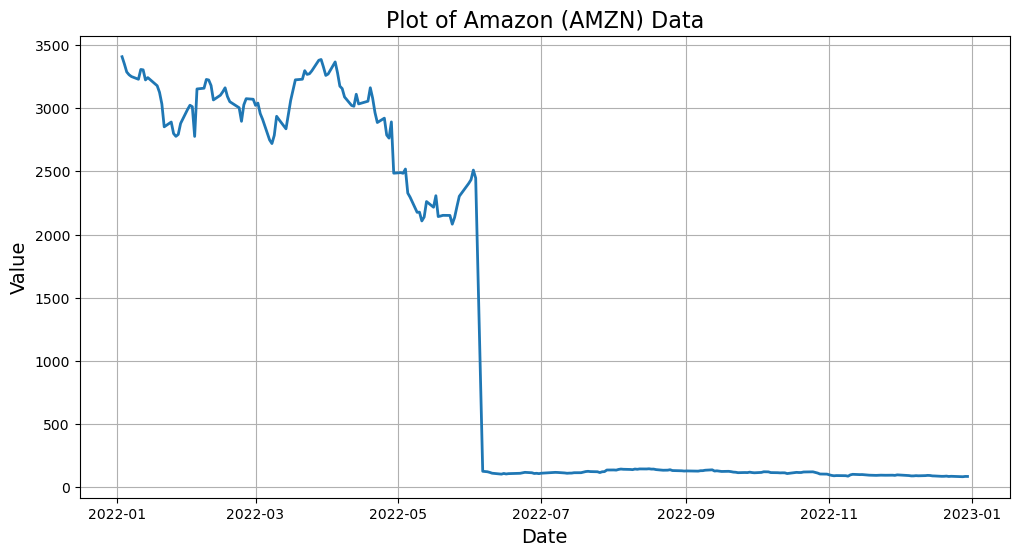

In [40]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(amzn_data.index, amzn_data.values, linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Plot of Amazon (AMZN) Data', fontsize=16)
plt.grid(True)
plt.show()

### Trend on AMZN

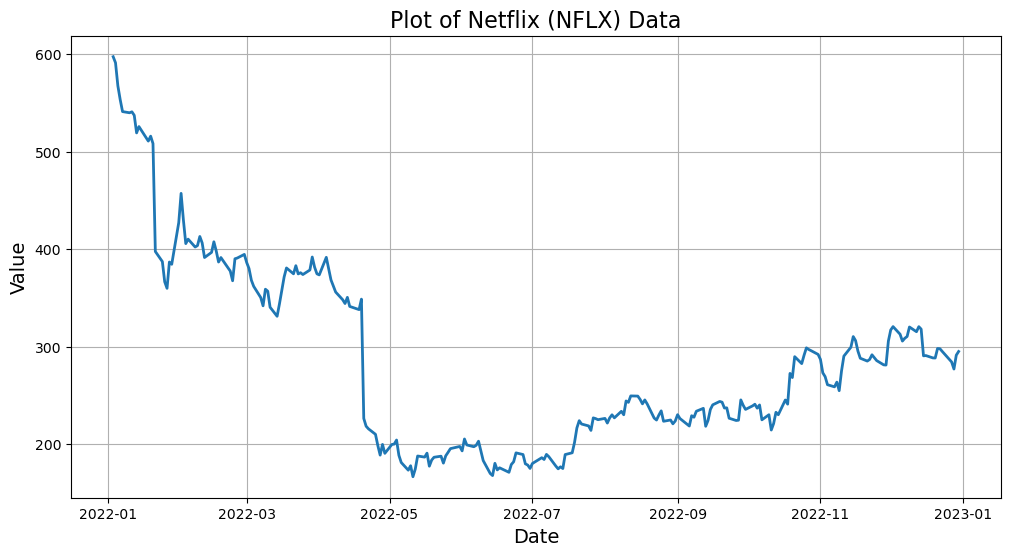

In [41]:
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(nflx_data.index, nflx_data.values, linewidth=2)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Plot of Netflix (NFLX) Data', fontsize=16)
plt.grid(True)
plt.show()

We perform time series decomposition for **AMZN**

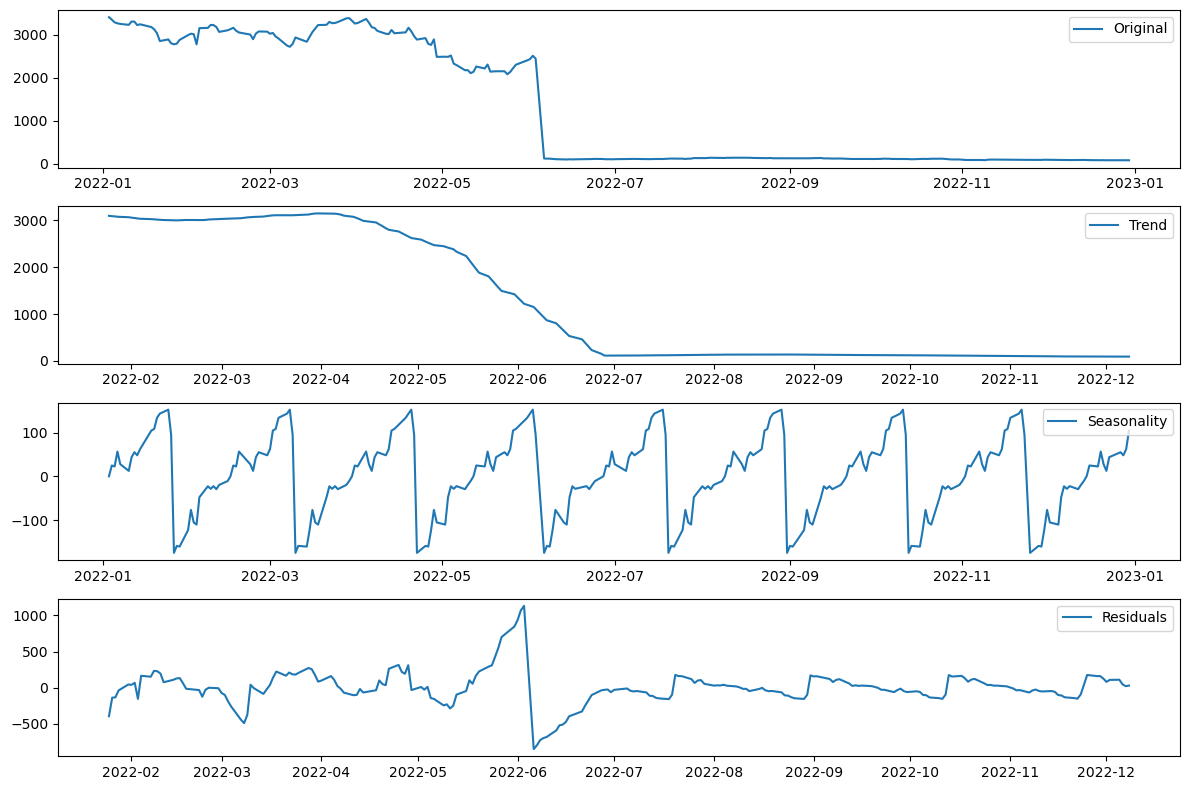

In [42]:
# Perform time series decomposition for AMZN
amzn_decomposition = seasonal_decompose(amzn_data, model='additive', period=30)

# Plot AMZN decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(amzn_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(amzn_decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(amzn_decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(amzn_decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

We perform time series decomposition for **NFLX**

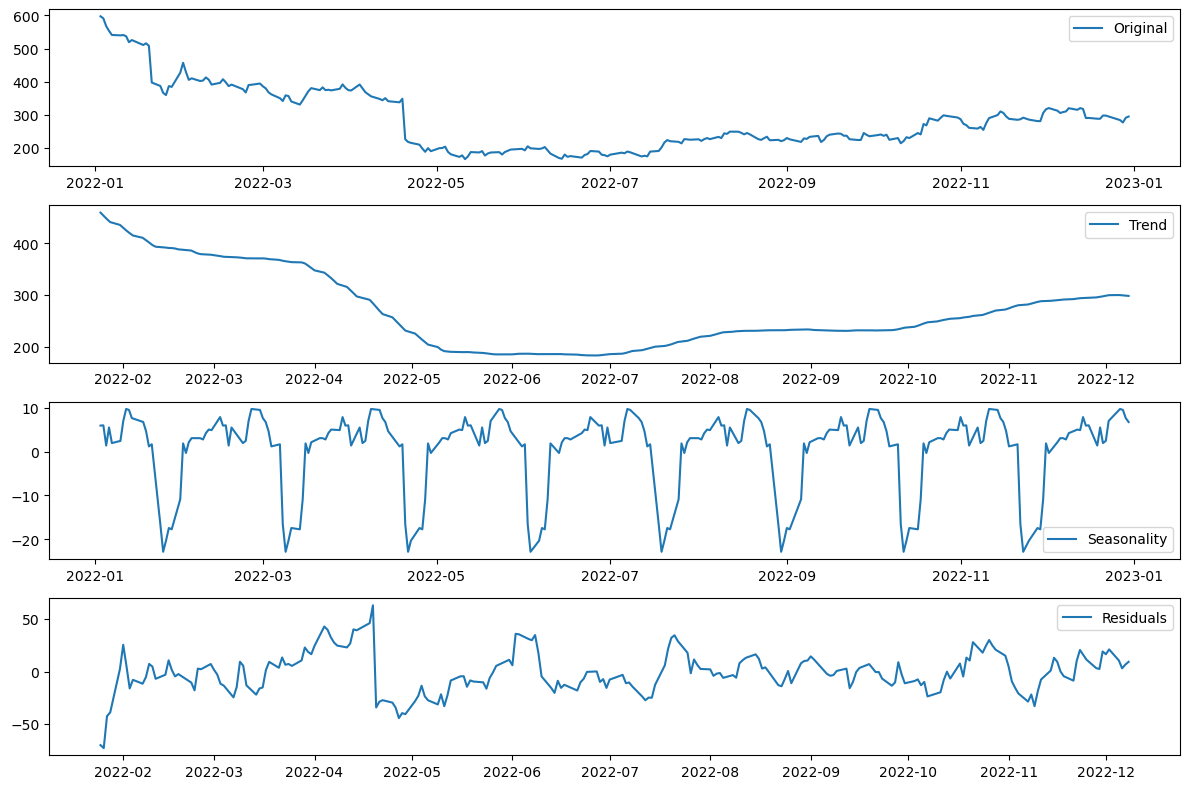

In [43]:
#Perform time series decomposition for NFLX
nflx_decomposition = seasonal_decompose(nflx_data, model='additive', period=30) 

# Plot NFLX decomposition
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(nflx_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(nflx_decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(nflx_decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(nflx_decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Stationarity

#### **Rolling Statistics** for AMZN

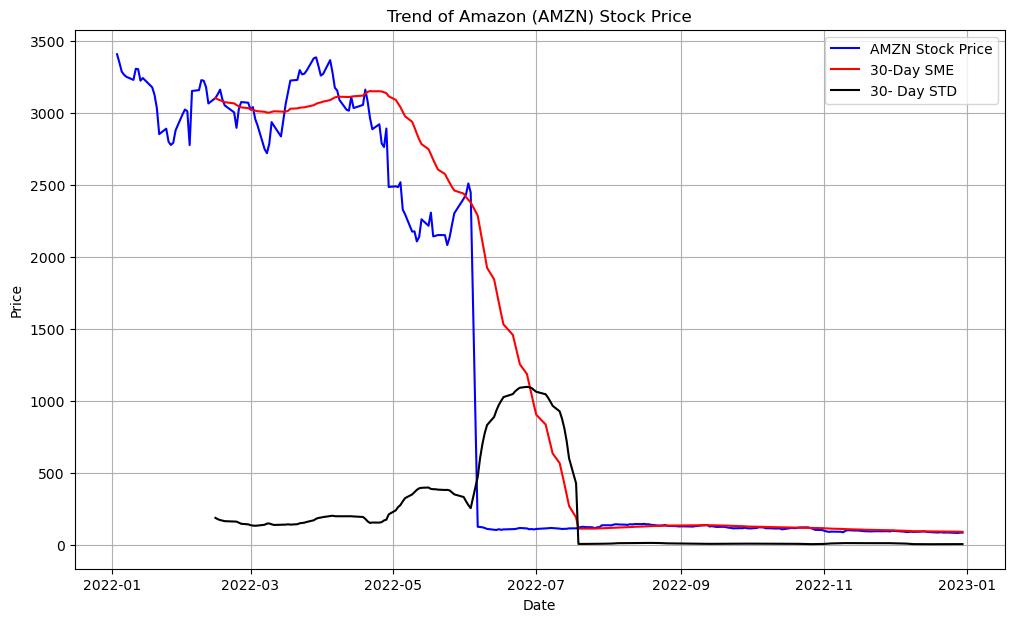

In [44]:
# Calculate simple moving averages (SMA) for 30 days
window = 30
amzn_mean = amzn_data.rolling(window=window).mean()
amzn_std = amzn_data.rolling(window=window).std()

# Plot AMZN stock prices and SMA
fig = plt.figure(figsize=(12,7))
plt.plot(amzn_data, color='blue', label='AMZN Stock Price')
plt.plot(amzn_mean, color='red', label=f'{window}-Day SME')
plt.plot(amzn_std, color = 'black', label = f'{window}- Day STD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Trend of Amazon (AMZN) Stock Price')
plt.grid(True)
plt.show()

The mean is not constant over time, so we can reconfirm our conclusion that the time series is non- stationary based on the rollig mean

#### **Dickey-Fuller**

In [45]:
result = adfuller(amzn_data)
# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -1.3346312911062364
p-value: 0.6131833499420565
Critical Values:
   1%: -3.456780859712
   5%: -2.8731715065600003
   10%: -2.572968544


**ADF Test Result for Amazon Stock Prices**

For the ADF test results you provided:

1. ADF Statistic: -1.33
2. p-value: 0.6

The p-value is higher than commonly accepted significance levels (like 0.05). We conclude that the Amazon stock prices data is likely non-stationary, meaning its statistical properties may change over time.


### Detrending the AMZN series

It is import to detrend so that it can imporve the accuracy of forecasting models. We are going to detrend using the **Differencing method**.

In [46]:
# Compute the first-order difference
amzn_diff = amzn_data.diff(periods=1)

# Display the first few rows of the differenced data
print(amzn_diff.head(10))

priceDate
2022-01-03      NaN
2022-01-04   -57.65
2022-01-05   -63.30
2022-01-06   -22.06
2022-01-07   -14.00
2022-01-10   -21.36
2022-01-11    77.52
2022-01-12    -3.10
2022-01-13   -79.86
2022-01-14    18.48
Name: close, dtype: float64


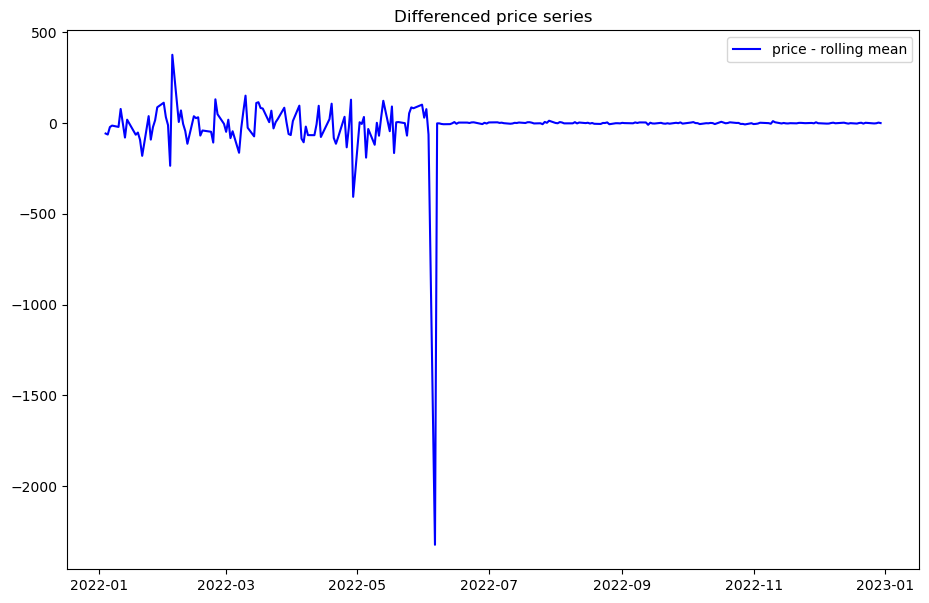

ADF Statistic: -15.592701557403087
p-value: 1.8714446099099064e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


In [47]:
amzn_diff.dropna(inplace=True)

fig = plt.figure(figsize=(11,7))
plt.plot(amzn_diff, color='blue',label='price - rolling mean')
plt.legend(loc='best')
plt.title('Differenced price series')
plt.show(block=False)

# Print ADF test results
detrend_result_diff = adfuller(amzn_diff)

print('ADF Statistic:', detrend_result_diff[0])
print('p-value:', detrend_result_diff[1])
print('Critical Values:', detrend_result_diff[4])


### Auto-Correlation and Partial Auto-Correlation of the Differenced Data
Plotting the ACF and PACF functions help determine the AR and MA components in the models we intend to build. These functions consider all the above components of a time series like the trend and the seasonality and find their correlations

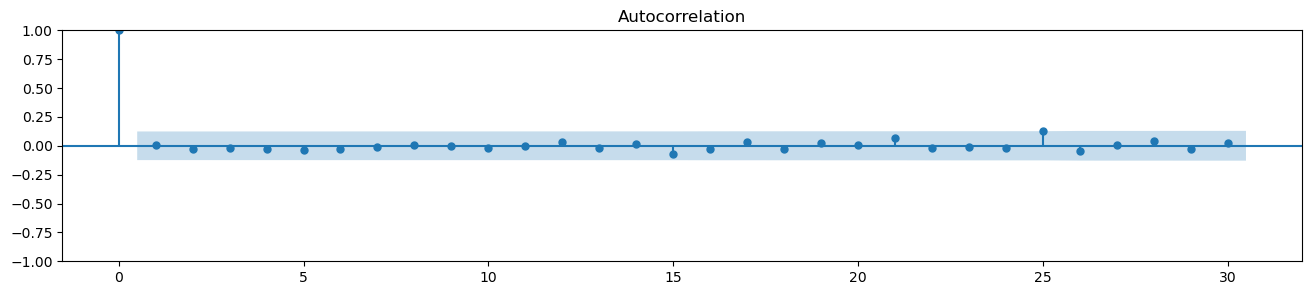

In [48]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
fig, ax = plt.subplots(figsize=(16, 3))
plot_acf(amzn_diff, ax=ax, lags=30)
plt.show();

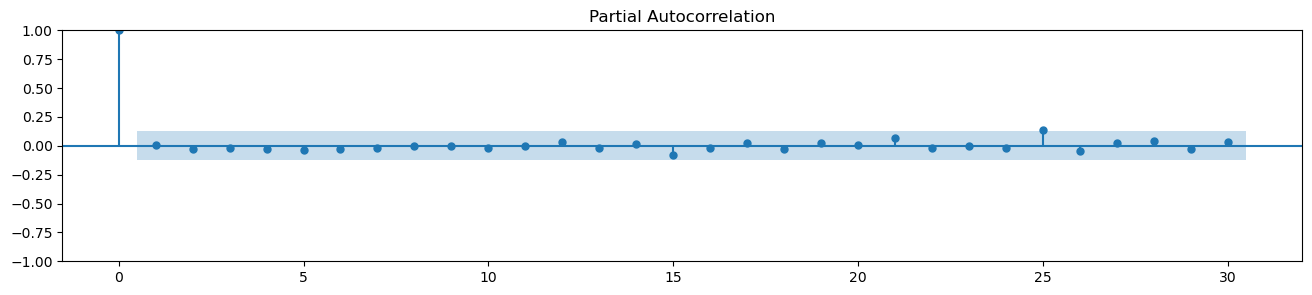

In [49]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF
fig, ax = plt.subplots(figsize = (16,3))
plot_pacf(amzn_diff, ax=ax, lags=30, method="ywm");

### Rolling Statistics Netflix

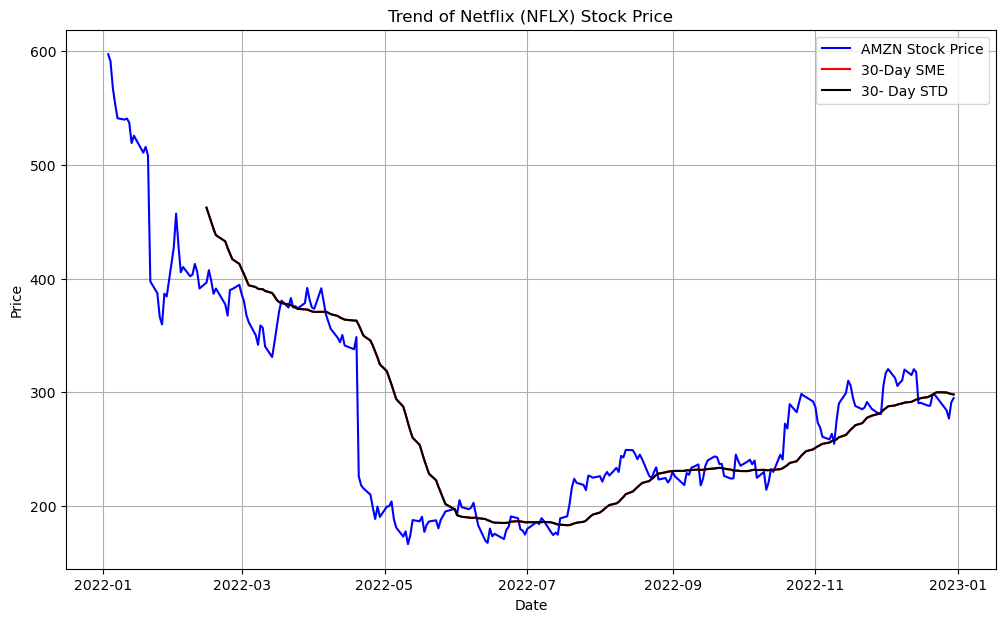

In [50]:
# Calculate simple moving averages (SMA) for 30 days
window = 30
nflx_mean = nflx_data.rolling(window=window).mean()
nflx_std = nflx_data.rolling(window=window).std()

# Plot AMZN stock prices and SMA
fig = plt.figure(figsize=(12,7))
plt.plot(nflx_data, color='blue', label='AMZN Stock Price')
plt.plot(nflx_mean, color='red', label=f'{window}-Day SME')
plt.plot(nflx_mean, color = 'black', label = f'{window}- Day STD')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.title('Trend of Netflix (NFLX) Stock Price')
plt.grid(True)
plt.show()

#### **Dickey-Fuller**

In [51]:
result = adfuller(nflx_data)
# Extract and print test results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

ADF Statistic: -3.5600197342949422
p-value: 0.006573006263161007
Critical Values:
   1%: -3.456780859712
   5%: -2.8731715065600003
   10%: -2.572968544


### Detrending the Netflix series

It is import to detrend so that it can imporve the accuracy of forecasting models. We are going to detrend using the **Differencing method**.

In [52]:
# Compute the first-order difference
nflx_diff = nflx_data.diff(periods=1)

# Display the first few rows of the differenced data
print(nflx_diff.head(10))

priceDate
2022-01-03      NaN
2022-01-04    -6.22
2022-01-05   -23.63
2022-01-06   -14.23
2022-01-07   -12.23
2022-01-10    -1.21
2022-01-11     0.99
2022-01-12    -3.62
2022-01-13   -18.02
2022-01-14     6.49
Name: close, dtype: float64


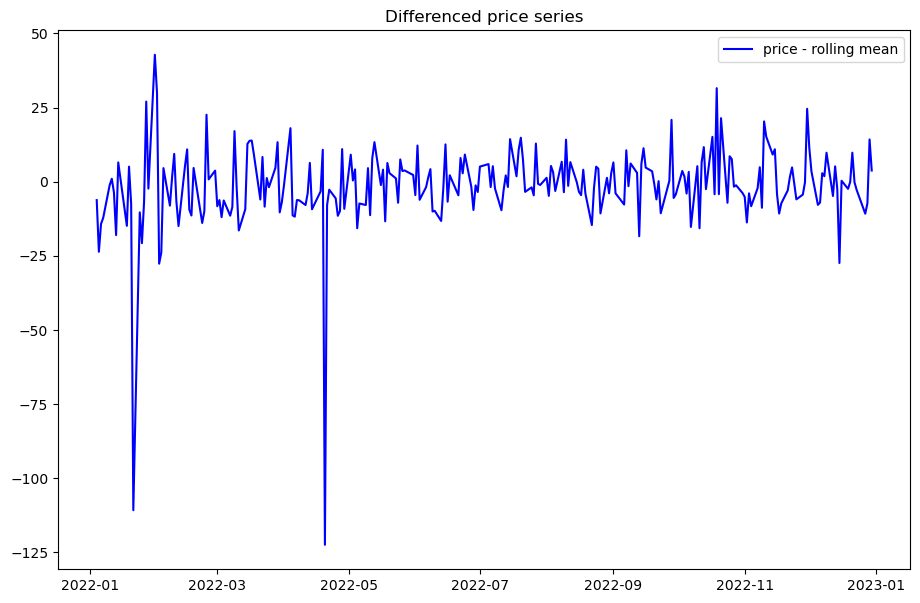

ADF Statistic: -14.867516830745085
p-value: 1.682675988302387e-27
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}


In [53]:
nflx_diff.dropna(inplace=True)

fig = plt.figure(figsize=(11,7))
plt.plot(nflx_diff, color='blue',label='price - rolling mean')
plt.legend(loc='best')
plt.title('Differenced price series')
plt.show(block=False)

# Print ADF test results
detrend_result_diff1 = adfuller(nflx_diff)

print('ADF Statistic:', detrend_result_diff1[0])
print('p-value:', detrend_result_diff1[1])
print('Critical Values:', detrend_result_diff1[4])

### Auto-Correlation and Partial Auto-Correlation of the Differenced Data (NFLX)

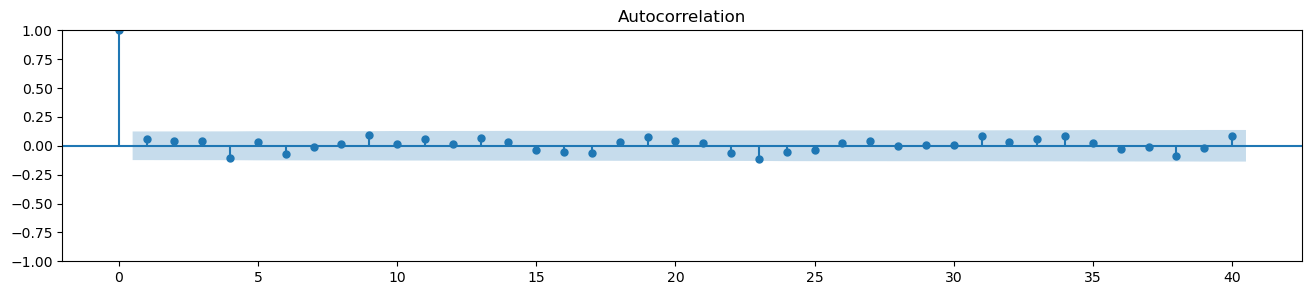

In [54]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot the ACF
fig, ax = plt.subplots(figsize=(16, 3))
plot_acf(nflx_diff, ax=ax, lags=40)
plt.show();

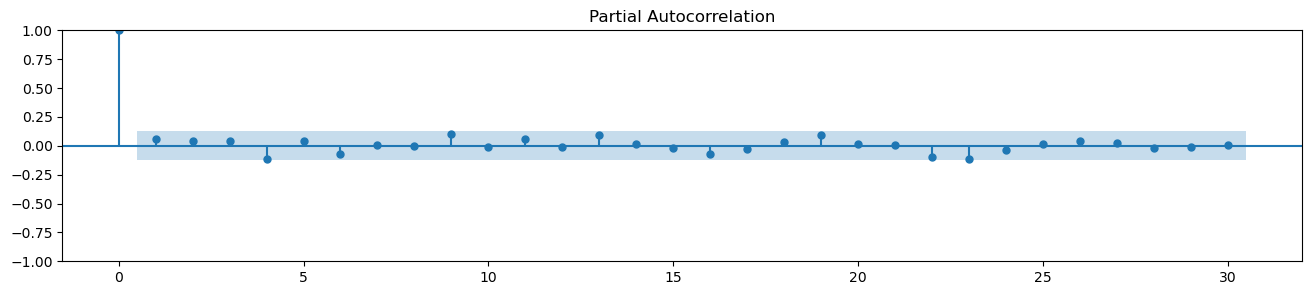

In [55]:
from statsmodels.graphics.tsaplots import plot_pacf

# Plot the PACF
fig, ax = plt.subplots(figsize = (16,3))
plot_pacf(nflx_diff, ax=ax, lags=30, method="ywm");


## Modelling the Time Series for AMZN and NFLX

* This section look at the iterative modeling process in a bid to deteremin the best model perfomance.
* In this section we will use the `AIC(Akaike's Information Criterion)` and `BIC(Bayesian Information Criterion)` as our metrics as the detereminant of the model perfomances.

For the modeling, we decided to pick the following for modelling: 
1. Moving Average - Base Model  (MA)
2. Autoregressive Model (AR)
3. AutoRegressive Moving Average Model (ARMA)
4. AutoRegressive Moving Integrated Average Model (ARIMA)
5. Seasonal AutoRegressive Moving Average (SARIMA) Model.
6. Facebook Prophet Model. 

In [96]:
amzn_diff = amzn_diff.ffill()

In [97]:
nflx_diff = nflx_diff.ffill()

### Moving Average (MA) Base Model (AMZN)

We build a MA model as our baseline model then increase its complexity with more complex models

In [58]:
# 2. Identify missing dates
missing_dates = pd.date_range(start=amzn_diff.index.min(), end=amzn_diff.index.max()).difference(amzn_diff.index)

# 3. Create a new date range that covers all dates in the original index
new_index = pd.date_range(start=amzn_diff.index.min(), end=amzn_diff.index.max())

# 4. Reindex the DataFrame with the new date range
amzn_diff = amzn_diff.reindex(new_index)

# Optionally, fill missing values with appropriate values
# amzn_diff.fillna(method='ffill', inplace=True)


In [59]:
## Fit an MA model
model_ma = ARIMA(amzn_diff, order =(0,0,0))
result_ma = model_ma.fit()

print(result_ma.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                          ARIMA   Log Likelihood               -1621.316
Date:                Sat, 27 Apr 2024   AIC                           3246.632
Time:                        17:28:40   BIC                           3254.410
Sample:                    01-04-2022   HQIC                          3249.724
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.2964     26.048     -0.510      0.610     -64.350      37.758
sigma2      2.516e+04    617.709     40.737      0.000     2.4e+04    2.64e+04
Ljung-Box (L1) (Q):                   0.07   Jarque-

In [60]:
print(result_ma.params)

const       -13.296364
sigma2    25163.443415
dtype: float64


### Moving Average (MA) Base Model (NFLX)

We build a MA model as our baseline model then increase its complexity with more complex models

In [61]:
# 2. Identify missing dates
missing_dates = pd.date_range(start=nflx_diff.index.min(), end=nflx_diff.index.max()).difference(amzn_diff.index)

# 3. Create a new date range that covers all dates in the original index
new_index = pd.date_range(start=nflx_diff.index.min(), end=nflx_diff.index.max())

# 4. Reindex the DataFrame with the new date range
nflx_diff = nflx_diff.reindex(new_index)

# Optionally, fill missing values with appropriate values
# amzn_diff.fillna(method='ffill', inplace=True)

In [62]:
## Fit an MA model
model_ma_two = ARIMA(nflx_diff, order =(0,0,0))
result_ma_two = model_ma_two.fit()

print(result_ma_two.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                          ARIMA   Log Likelihood               -1020.666
Date:                Sat, 27 Apr 2024   AIC                           2045.332
Time:                        17:28:41   BIC                           2053.110
Sample:                    01-04-2022   HQIC                          2048.424
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2100      1.224     -0.988      0.323      -3.609       1.189
sigma2       205.9116      6.020     34.206      0.000     194.113     217.710
Ljung-Box (L1) (Q):                   0.49   Jarque-

In [63]:
print(result_ma_two.params)

const      -1.209965
sigma2    205.911588
dtype: float64


### AutoRegressive (AR) Model (AMZN)

In [64]:
# Fit an AR model
mod_ar= ARIMA(amzn_diff, order=(1,0,0))
result_ar = mod_ar.fit()

# Print out summary information on the fit
print(result_ar.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1621.229
Date:                Sat, 27 Apr 2024   AIC                           3248.458
Time:                        17:28:42   BIC                           3260.124
Sample:                    01-04-2022   HQIC                          3253.096
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.2963     25.220     -0.527      0.598     -62.726      36.134
ar.L1         -0.0498      0.098     -0.507      0.612      -0.242       0.142
sigma2      2.524e+04    681.538     37.037      0.0

`Observation:`

* The `AIC value of 3248.458` and `BIC value of 3260.124` in our second model does not indicate an improvement in the balance between model fit and complexity compared to your previous model.

* These slightly higher AIC and BIC values suggest a not better fitting model or a reduction in unnecessary complexity.

### AutoRegressive (AR) Model (NFLX)

In [65]:
# Fit an AR model
mod_ar_two= ARIMA(nflx_diff, order=(1,0,0))
result_ar_two = mod_ar_two.fit()

# Print out summary information on the fit
print(result_ar_two.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -1020.460
Date:                Sat, 27 Apr 2024   AIC                           2046.921
Time:                        17:28:42   BIC                           2058.588
Sample:                    01-04-2022   HQIC                          2051.559
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2206      1.280     -0.954      0.340      -3.729       1.288
ar.L1          0.0448      0.083      0.537      0.591      -0.119       0.208
sigma2       205.4345      6.016     34.149      0.0

### AutoRegressive Moving Average (ARMA) Model (AMZN)

In [66]:
# Fit an ARMA model
model_arma = ARIMA(amzn_diff, order=(1,0,1))
result_arma = model_arma.fit()

# Print out summary information on the fit
print(result_arma.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1621.208
Date:                Sat, 27 Apr 2024   AIC                           3250.417
Time:                        17:28:43   BIC                           3265.972
Sample:                    01-04-2022   HQIC                          3256.601
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.1382     24.707     -0.532      0.595     -61.562      35.286
ar.L1          0.1888      6.253      0.030      0.976     -12.067      12.445
ma.L1         -0.2439      6.279     -0.039      0.9

`Observation:`

* The `AIC value of 3250.417` and `BIC value of 3265.972` in our model.  This is a bit higher than the previous model therefore the model is not best fit.


### AutoRegressive Moving Average (ARMA) Model (NFLX)

In [67]:
# Fit an ARMA model
model_arma_two = ARIMA(nflx_diff, order=(1,0,1))
result_arma_two = model_arma_two.fit()

# Print out summary information on the fit
print(result_arma_two.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1020.241
Date:                Sat, 27 Apr 2024   AIC                           2048.483
Time:                        17:28:43   BIC                           2064.038
Sample:                    01-04-2022   HQIC                          2054.667
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4554      2.303     -0.632      0.527      -5.970       3.059
ar.L1          0.9892      0.046     21.403      0.000       0.899       1.080
ma.L1         -0.9777      0.063    -15.596      0.0

### AutoRegressie Integrated Moving Avergaes (AMZN)

In [68]:
# Import ARIMA
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [69]:
# 2. Identify missing dates
#missing_dates = pd.date_range(start=amzn_diff.index.min(), end=amzn_diff.index.max()).difference(amzn_diff.index)

# 3. Create a new date range that covers all dates in the original index
#new_index = pd.date_range(start=amzn_diff.index.min(), end=amzn_diff.index.max())

# 4. Reindex the DataFrame with the new date range
#amzn_diff = amzn_diff.reindex(new_index)

# Optionally, fill missing values with appropriate values
# amzn_diff.fillna(method='ffill', inplace=True)


In [70]:
model_arima = ARIMA(amzn_diff, order =(1,1,1))
arima_result = model_arima.fit()

print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1618.030
Date:                Sat, 27 Apr 2024   AIC                           3242.061
Time:                        17:28:44   BIC                           3253.719
Sample:                    01-04-2022   HQIC                          3246.696
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0399      0.153     -0.261      0.794      -0.339       0.259
ma.L1         -0.9980      0.391     -2.550      0.011      -1.765      -0.231
sigma2      2.526e+04   8036.701      3.143      0.0

`Observation:`

* The `AIC value of 3242.061` and `BIC value of 3252.719` in our model. This indicare an improvemnt in our model. The lower AIC and BIC suggest a better fitting model


### AutoRegressie Integrated Moving Avergaes (NFLX)

In [71]:
model_arima_two = ARIMA(nflx_diff, order =(1,1,1))
arima_result_two = model_arima_two.fit()

print(arima_result_two.summary())

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                  361
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1018.348
Date:                Sat, 27 Apr 2024   AIC                           2042.696
Time:                        17:28:45   BIC                           2054.354
Sample:                    01-04-2022   HQIC                          2047.331
                         - 12-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0267      0.081      0.329      0.742      -0.133       0.186
ma.L1         -0.9827      0.023    -42.135      0.000      -1.028      -0.937
sigma2       205.4451      6.731     30.524      0.0

### Seasonall AutoRegressive Moving Average Model (SARIMA) (AMZN)

In [72]:
!pip install pmdarima

import pmdarima as pm

In [98]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Train-test split
train_data = amzn_diff.iloc[:len(amzn_diff) - 12]
test_data = amzn_diff.iloc[len(amzn_diff) - 12:]

#  Fit the model
model = pm.auto_arima(amzn_diff, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train_data) 

# Print model summary to identify the best p,d,q
print(f"Summary for amzn_diff {amzn_diff}:")
print(model.summary())
print()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=4600.691, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4599.550, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4595.762, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4596.393, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4599.717, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4596.725, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=4596.899, Time=0.11 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=4598.720, Time=0.24 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4595.441, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4596.230, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=4596.392, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4596.160, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=4598.243, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.898 seconds
Summary for amzn_diff 

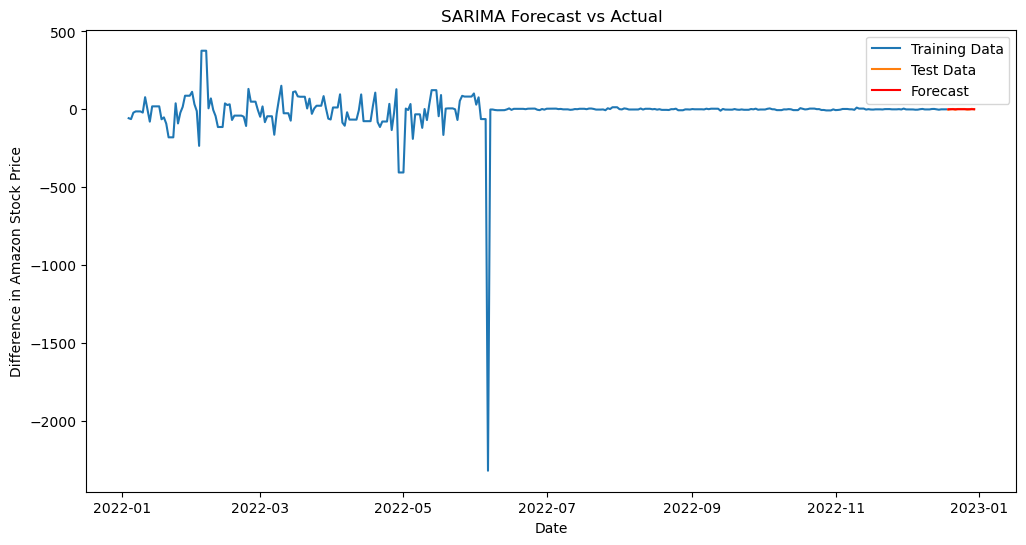

Mean Squared Error (MSE): 3.346174625102716


In [99]:
# Make predictions
forecast = model.predict(n_periods=len(test_data))

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Training Data')
plt.plot(test_data.index, test_data, label='Test Data')
plt.plot(test_data.index, forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Difference in Amazon Stock Price')
plt.legend()
plt.show()

# Evaluate performance
mse = mean_squared_error(test_data, forecast)
print(f'Mean Squared Error (MSE): {mse}')

### SARIMA Netflix (NFLX)

In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Train-test split
train_data_two = nflx_diff.iloc[:len(nflx_diff) - 12]
test_data_two = nflx_diff.iloc[len(nflx_diff) - 12:]

#  Fit the model
model_two = pm.auto_arima(nflx_diff, trace=True, error_action='ignore', suppress_warnings=True)
model_two.fit(train_data_two) 

# Print model summary to identify the best p,d,q
print(f"Summary for nflx_diff {nflx_diff}:")
print(model_two.summary())
print()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3041.063, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3000.809, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2971.412, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3039.064, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2969.432, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2920.180, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2998.815, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2921.510, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=2921.627, Time=0.22 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=2931.661, Time=0.10 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2988.244, T

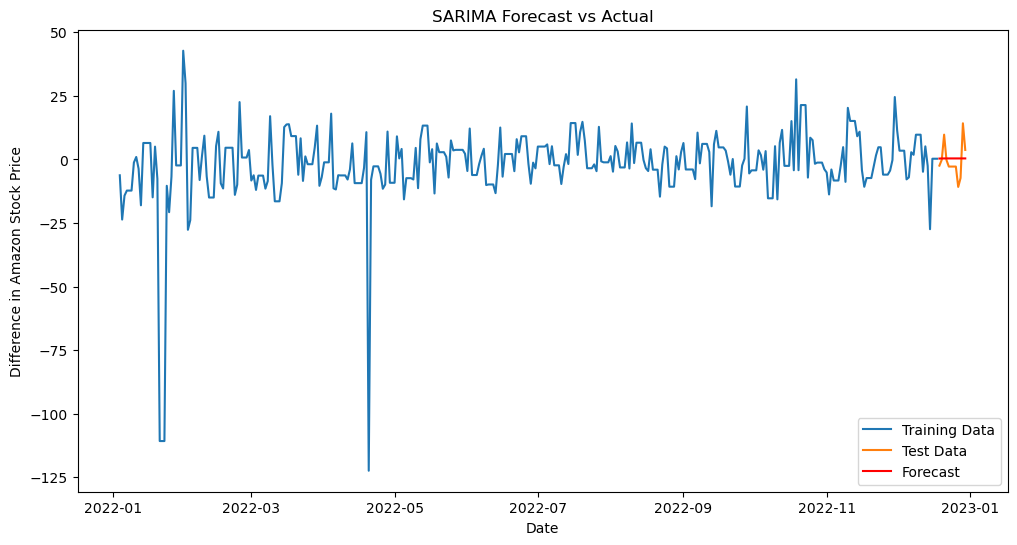

Mean Squared Error (MSE): 43.693704059154065


In [101]:
# Make predictions
forecast = model_two.predict(n_periods=len(test_data))

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data_two.index, train_data_two, label='Training Data')
plt.plot(test_data_two.index, test_data_two, label='Test Data')
plt.plot(test_data_two.index, forecast, label='Forecast', color='red')
plt.title('SARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Difference in Amazon Stock Price')
plt.legend()
plt.show()

# Evaluate performance
mse = mean_squared_error(test_data_two, forecast)
print(f'Mean Squared Error (MSE): {mse}')

### Facebook Prophet

**Prophet** is an open-source tool from Facebook used for forecasting time series data which helps businesses understand and possibly predict the market. It is based on a decomposable additive model where non-linear trends fit with seasonality, it also takes into account the effects of holidays.

In [74]:
amzn_diff.head()

2022-01-04   -57.65
2022-01-05   -63.30
2022-01-06   -22.06
2022-01-07   -14.00
2022-01-08      NaN
Freq: D, Name: close, dtype: float64

In [75]:
amzn_diff_df = pd.DataFrame(amzn_diff)
amzn_diff_df.head()

,close
2022-01-04,-57.65
2022-01-05,-63.30
2022-01-06,-22.06
2022-01-07,-14.00
2022-01-08,NaN


In [76]:
amzn_diff_df.index

DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24',
               '2022-12-25', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', length=361, freq='D')

In [77]:
## covert the data type of close to numeric
amzn_diff_df['close'] = pd.to_numeric(amzn_diff_df['close'])

In [78]:
# Reset index 'priceDate'to  a column again
amzn_diff_df.reset_index(inplace=True)

## rename ds and y
amzn_diff_df.rename(columns={'priceDate': 'ds', 'close': 'y'}, inplace=True)

In [79]:
amzn_diff_df.dtypes

index    datetime64[ns]
y               float64
dtype: object

In [80]:
amzn_diff_df.columns

Index(['index', 'y'], dtype='object')

In [81]:
amzn_diff_df.head()

,index,y
0,2022-01-04,-57.65
1,2022-01-05,-63.30
2,2022-01-06,-22.06
3,2022-01-07,-14.00
4,2022-01-08,NaN


In [82]:
amzn_diff_df.rename(columns={'index': 'ds'}, inplace=True)

In [83]:
amzn_diff_df.head()

,ds,y
0,2022-01-04,-57.65
1,2022-01-05,-63.30
2,2022-01-06,-22.06
3,2022-01-07,-14.00
4,2022-01-08,NaN


In [84]:
amzn_diff_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [85]:
series_amzn = amzn_df.copy()
series_amzn

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,month,quarter,year,7_day_ma,30_day_ma,close_std,rsi,close_lag_1,close_lag_7,close_pct_change
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,3408.09,3414.070,3323.2100,3351.00,AMZN,6.399713e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.847333,...,1,1,2022,691.047143,350.906000,1198.105079,99.115920,239.82,244.43,13.211033
2022-01-04,3350.44,3428.000,3326.9900,3408.76,AMZN,7.086689e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.816085,...,1,1,2022,1135.654286,454.546667,1532.769654,97.364972,3408.09,238.19,-0.016916
2022-01-05,3287.14,3342.525,3287.1400,3337.66,AMZN,6.443158e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.781773,...,1,1,2022,1571.141429,556.049667,1662.987829,95.513156,3350.44,238.73,-0.018893
2022-01-06,3265.08,3296.000,3238.7442,3269.01,AMZN,5.206190e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.769816,...,1,1,2022,2003.730000,656.718000,1651.899352,95.117383,3287.14,236.96,-0.006711
2022-01-07,3251.08,3304.865,3240.6200,3276.78,AMZN,4.669930e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.762227,...,1,1,2022,2434.665714,756.834667,1499.916835,94.842713,3265.08,234.53,-0.004288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,85.25,85.780,82.9344,83.25,AMZN,5.743366e+07,HISTORICAL_PRICES,AMZN,1.713003e+12,-0.953791,...,12,4,2022,86.032857,91.802667,1.698850,37.681779,83.79,91.58,0.017425
2022-12-27,83.04,85.350,83.0000,84.97,AMZN,5.728404e+07,HISTORICAL_PRICES,AMZN,1.713003e+12,-0.954989,...,12,4,2022,85.260000,91.211000,1.645701,38.589575,85.25,88.45,-0.025924
2022-12-28,81.82,83.480,81.6900,82.80,AMZN,5.822858e+07,HISTORICAL_PRICES,AMZN,1.713003e+12,-0.955650,...,12,4,2022,84.397143,90.655333,1.638696,36.073826,83.04,87.86,-0.014692


In [86]:
#transforms the index of the DataFrame into a regular column named 'Date',
series_amzn['priceDate'] = series_amzn.index
series_amzn

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,quarter,year,7_day_ma,30_day_ma,close_std,rsi,close_lag_1,close_lag_7,close_pct_change,priceDate
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,3408.09,3414.070,3323.2100,3351.00,AMZN,6.399713e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.847333,...,1,2022,691.047143,350.906000,1198.105079,99.115920,239.82,244.43,13.211033,2022-01-03
2022-01-04,3350.44,3428.000,3326.9900,3408.76,AMZN,7.086689e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.816085,...,1,2022,1135.654286,454.546667,1532.769654,97.364972,3408.09,238.19,-0.016916,2022-01-04
2022-01-05,3287.14,3342.525,3287.1400,3337.66,AMZN,6.443158e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.781773,...,1,2022,1571.141429,556.049667,1662.987829,95.513156,3350.44,238.73,-0.018893,2022-01-05
2022-01-06,3265.08,3296.000,3238.7442,3269.01,AMZN,5.206190e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.769816,...,1,2022,2003.730000,656.718000,1651.899352,95.117383,3287.14,236.96,-0.006711,2022-01-06
2022-01-07,3251.08,3304.865,3240.6200,3276.78,AMZN,4.669930e+07,HISTORICAL_PRICES,AMZN,1.713001e+12,0.762227,...,1,2022,2434.665714,756.834667,1499.916835,94.842713,3265.08,234.53,-0.004288,2022-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,85.25,85.780,82.9344,83.25,AMZN,5.743366e+07,HISTORICAL_PRICES,AMZN,1.713003e+12,-0.953791,...,4,2022,86.032857,91.802667,1.698850,37.681779,83.79,91.58,0.017425,2022-12-23
2022-12-27,83.04,85.350,83.0000,84.97,AMZN,5.728404e+07,HISTORICAL_PRICES,AMZN,1.713003e+12,-0.954989,...,4,2022,85.260000,91.211000,1.645701,38.589575,85.25,88.45,-0.025924,2022-12-27
2022-12-28,81.82,83.480,81.6900,82.80,AMZN,5.822858e+07,HISTORICAL_PRICES,AMZN,1.713003e+12,-0.955650,...,4,2022,84.397143,90.655333,1.638696,36.073826,83.04,87.86,-0.014692,2022-12-28


In [87]:
series_amzn.columns

Index(['close', 'high', 'low', 'open', 'symbol', 'volume', 'id', 'key',
       'updated', 'changeOverTime', 'marketChangeOverTime', 'uOpen', 'uClose',
       'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh', 'fLow',
       'fVolume', 'label', 'change', 'changePercent', 'Name', 'day_of_week',
       'month', 'quarter', 'year', '7_day_ma', '30_day_ma', 'close_std', 'rsi',
       'close_lag_1', 'close_lag_7', 'close_pct_change', 'priceDate'],
      dtype='object')

In [88]:
series_amzn = series_amzn[['priceDate','close']]
series_amzn = series_amzn.reset_index(drop=True)

In [89]:
series_amzn.head()

,priceDate,close
0,2022-01-03,3408.09
1,2022-01-04,3350.44
2,2022-01-05,3287.14
3,2022-01-06,3265.08
4,2022-01-07,3251.08


In [90]:
start_date = '2022-01-01'
end_date = '2022-12-31'
series_amzn = series_amzn[(series_amzn['priceDate'] >= start_date) & (series_amzn['priceDate'] <= end_date)]

In [91]:
series_amzn.columns = ['ds','y']
series_amzn.head()

,ds,y
0,2022-01-03,3408.09
1,2022-01-04,3350.44
2,2022-01-05,3287.14
3,2022-01-06,3265.08
4,2022-01-07,3251.08


In [92]:
## Intialize
amzn_prophet = Prophet()
amzn_prophet.fit(series_amzn)

17:29:20 - cmdstanpy - INFO - Chain [1] start processing
17:29:21 - cmdstanpy - INFO - Chain [1] done processing


In [93]:
# Define the number of periods and frequency
periods = 36  # Number of periods into the future
freq = 'MS'   # Frequency: Monthly start


# Make future dataframe
future_dates = amzn_prophet.make_future_dataframe(periods=periods, freq=freq)
forecast = amzn_prophet.predict(future_dates)


forecasted_data = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecasted_data

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-03,3376.287893,2943.759757,3829.279139
1,2022-01-04,3371.709008,2936.845713,3803.465156
2,2022-01-05,3368.803225,2906.786552,3825.581703
3,2022-01-06,3364.553327,2925.725436,3780.212481
4,2022-01-07,3356.933900,2939.118592,3804.569203
...,...,...,...,...
282,2025-08-01,-256.870472,-10120.113859,10345.534455
283,2025-09-01,-269.865660,-10464.110069,10742.631247
284,2025-10-01,-276.248348,-11041.906104,11190.767092
285,2025-11-01,-283.376899,-11698.629820,11568.596994


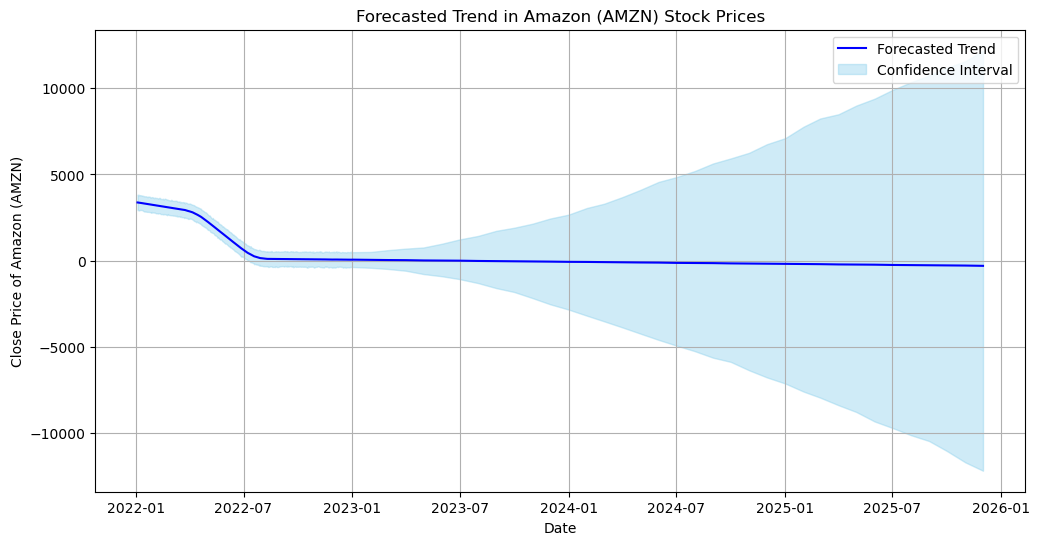

In [94]:
import matplotlib.pyplot as plt

# Plotting the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(forecast['ds'], forecast['yhat'], color='blue', label='Forecasted Trend')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='skyblue', alpha=0.4, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Close Price of Amazon (AMZN)')
plt.title('Forecasted Trend in Amazon (AMZN) Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


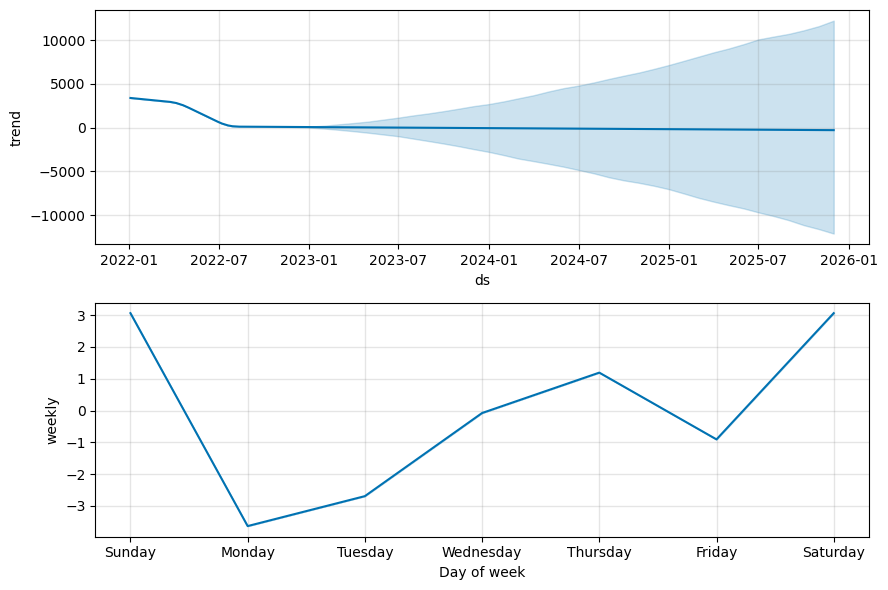

In [95]:
# Plot the components of the forecasted data
fig = amzn_prophet.plot_components(forecast)

### Prophet for Facebook

In [102]:
nflx_diff.head()

2022-01-04    -6.22
2022-01-05   -23.63
2022-01-06   -14.23
2022-01-07   -12.23
2022-01-08   -12.23
Freq: D, Name: close, dtype: float64

In [104]:
nflx_diff_df = pd.DataFrame(nflx_diff)
nflx_diff_df.head()

,close
2022-01-04,-6.22
2022-01-05,-23.63
2022-01-06,-14.23
2022-01-07,-12.23
2022-01-08,-12.23


In [105]:
nflx_diff_df.index

DatetimeIndex(['2022-01-04', '2022-01-05', '2022-01-06', '2022-01-07',
               '2022-01-08', '2022-01-09', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13',
               ...
               '2022-12-21', '2022-12-22', '2022-12-23', '2022-12-24',
               '2022-12-25', '2022-12-26', '2022-12-27', '2022-12-28',
               '2022-12-29', '2022-12-30'],
              dtype='datetime64[ns]', length=361, freq='D')

In [106]:
## covert the data type of close to numeric
nflx_diff_df['close'] = pd.to_numeric(nflx_diff_df['close'])

In [107]:
# Reset index 'priceDate'to  a column again
nflx_diff_df.reset_index(inplace=True)

## rename ds and y
nflx_diff_df.rename(columns={'priceDate': 'ds', 'close': 'y'}, inplace=True)

In [108]:
nflx_diff_df.dtypes

index    datetime64[ns]
y               float64
dtype: object

In [109]:
nflx_diff_df.rename(columns={'index': 'ds'}, inplace=True)

In [110]:
nflx_diff_df.head()

,ds,y
0,2022-01-04,-6.22
1,2022-01-05,-23.63
2,2022-01-06,-14.23
3,2022-01-07,-12.23
4,2022-01-08,-12.23


In [111]:
nflx_diff_df.head()

,ds,y
0,2022-01-04,-6.22
1,2022-01-05,-23.63
2,2022-01-06,-14.23
3,2022-01-07,-12.23
4,2022-01-08,-12.23


In [112]:
series_nflx =nflx_df.copy()
series_nflx

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,month,quarter,year,7_day_ma,30_day_ma,close_std,rsi,close_lag_1,close_lag_7,close_pct_change
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,597.370,609.9900,590.5600,605.61,NFLX,3068808.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.712300,...,1,1,2022,139.981429,81.077667,201.689599,99.493375,63.610,63.80,8.391133
2022-01-04,591.150,600.4099,581.6000,599.91,NFLX,4393135.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.694471,...,1,1,2022,215.382857,98.744667,258.828679,98.357979,597.370,63.34,-0.010412
2022-01-05,567.520,592.8400,566.8800,592.00,NFLX,4148749.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.626738,...,1,1,2022,287.340000,115.592667,278.908039,94.271044,591.150,63.82,-0.039973
2022-01-06,553.290,563.3600,542.0100,554.34,NFLX,5711795.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.585949,...,1,1,2022,357.208571,131.957333,274.927035,92.108790,567.520,64.21,-0.025074
2022-01-07,541.060,553.4300,538.2175,549.46,NFLX,3382873.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.550893,...,1,1,2022,425.421429,147.905000,247.829252,90.267886,553.290,63.57,-0.022104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,294.965,298.4614,291.9100,296.18,NFLX,4251108.0,HISTORICAL_PRICES,NFLX,1.713003e+12,-0.154513,...,12,4,2022,292.612143,300.038500,4.225924,38.552965,297.750,317.83,-0.009353
2022-12-27,284.170,293.5700,282.1300,293.19,NFLX,5778098.0,HISTORICAL_PRICES,NFLX,1.713003e+12,-0.185456,...,12,4,2022,291.720714,299.839833,5.291635,36.755418,294.965,290.41,-0.036598
2022-12-28,276.880,285.1900,273.4100,281.92,NFLX,5964369.0,HISTORICAL_PRICES,NFLX,1.713003e+12,-0.206352,...,12,4,2022,289.745000,299.093500,7.744994,31.486264,284.170,290.71,-0.025654


In [113]:
#transforms the index of the DataFrame into a regular column named 'Date',
series_nflx['priceDate'] = series_nflx.index
series_nflx

,close,high,low,open,symbol,volume,id,key,updated,changeOverTime,...,quarter,year,7_day_ma,30_day_ma,close_std,rsi,close_lag_1,close_lag_7,close_pct_change,priceDate
priceDate,,,,,,,,,,,,,,,,,,,,,
2022-01-03,597.370,609.9900,590.5600,605.61,NFLX,3068808.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.712300,...,1,2022,139.981429,81.077667,201.689599,99.493375,63.610,63.80,8.391133,2022-01-03
2022-01-04,591.150,600.4099,581.6000,599.91,NFLX,4393135.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.694471,...,1,2022,215.382857,98.744667,258.828679,98.357979,597.370,63.34,-0.010412,2022-01-04
2022-01-05,567.520,592.8400,566.8800,592.00,NFLX,4148749.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.626738,...,1,2022,287.340000,115.592667,278.908039,94.271044,591.150,63.82,-0.039973,2022-01-05
2022-01-06,553.290,563.3600,542.0100,554.34,NFLX,5711795.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.585949,...,1,2022,357.208571,131.957333,274.927035,92.108790,567.520,64.21,-0.025074,2022-01-06
2022-01-07,541.060,553.4300,538.2175,549.46,NFLX,3382873.0,HISTORICAL_PRICES,NFLX,1.713001e+12,0.550893,...,1,2022,425.421429,147.905000,247.829252,90.267886,553.290,63.57,-0.022104,2022-01-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,294.965,298.4614,291.9100,296.18,NFLX,4251108.0,HISTORICAL_PRICES,NFLX,1.713003e+12,-0.154513,...,4,2022,292.612143,300.038500,4.225924,38.552965,297.750,317.83,-0.009353,2022-12-23
2022-12-27,284.170,293.5700,282.1300,293.19,NFLX,5778098.0,HISTORICAL_PRICES,NFLX,1.713003e+12,-0.185456,...,4,2022,291.720714,299.839833,5.291635,36.755418,294.965,290.41,-0.036598,2022-12-27
2022-12-28,276.880,285.1900,273.4100,281.92,NFLX,5964369.0,HISTORICAL_PRICES,NFLX,1.713003e+12,-0.206352,...,4,2022,289.745000,299.093500,7.744994,31.486264,284.170,290.71,-0.025654,2022-12-28


In [114]:
series_nflx.columns

Index(['close', 'high', 'low', 'open', 'symbol', 'volume', 'id', 'key',
       'updated', 'changeOverTime', 'marketChangeOverTime', 'uOpen', 'uClose',
       'uHigh', 'uLow', 'uVolume', 'fOpen', 'fClose', 'fHigh', 'fLow',
       'fVolume', 'label', 'change', 'changePercent', 'Name', 'day_of_week',
       'month', 'quarter', 'year', '7_day_ma', '30_day_ma', 'close_std', 'rsi',
       'close_lag_1', 'close_lag_7', 'close_pct_change', 'priceDate'],
      dtype='object')

In [115]:
series_nflx = series_nflx[['priceDate','close']]
series_nflx = series_nflx.reset_index(drop=True)

In [116]:
series_nflx.head()

,priceDate,close
0,2022-01-03,597.37
1,2022-01-04,591.15
2,2022-01-05,567.52
3,2022-01-06,553.29
4,2022-01-07,541.06


In [117]:
start_date = '2022-01-01'
end_date = '2022-12-31'
series_nflx = series_nflx[(series_nflx['priceDate'] >= start_date) & (series_nflx['priceDate'] <= end_date)]

In [118]:
series_nflx.columns = ['ds','y']
series_nflx.head()

,ds,y
0,2022-01-03,597.37
1,2022-01-04,591.15
2,2022-01-05,567.52
3,2022-01-06,553.29
4,2022-01-07,541.06


In [120]:
## Intialize
amzn_prophet_two = Prophet()
amzn_prophet_two.fit(series_nflx)

17:42:01 - cmdstanpy - INFO - Chain [1] start processing
17:42:01 - cmdstanpy - INFO - Chain [1] done processing


In [125]:
# Define the number of periods and frequency
periods = 36  # Number of periods into the future
freq = 'MS'   # Frequency: Monthly start


# Make future dataframe
future_dates_two = amzn_prophet_two.make_future_dataframe(periods=periods, freq=freq)
forecast_two = amzn_prophet_two.predict(future_dates_two)


forecasted_data_two = forecast_two[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecasted_data_two

,ds,yhat,yhat_lower,yhat_upper
0,2022-01-03,520.490380,483.793630,560.554486
1,2022-01-04,516.997258,477.663245,559.365006
2,2022-01-05,514.014202,474.836579,553.419493
3,2022-01-06,511.963724,470.580349,554.703700
4,2022-01-07,506.195749,464.991518,545.692112
...,...,...,...,...
282,2025-08-01,911.133695,239.611057,1676.577906
283,2025-09-01,935.860588,217.615261,1717.022689
284,2025-10-01,953.340248,213.894979,1781.127252
285,2025-11-01,1018.393596,244.054177,1878.216158


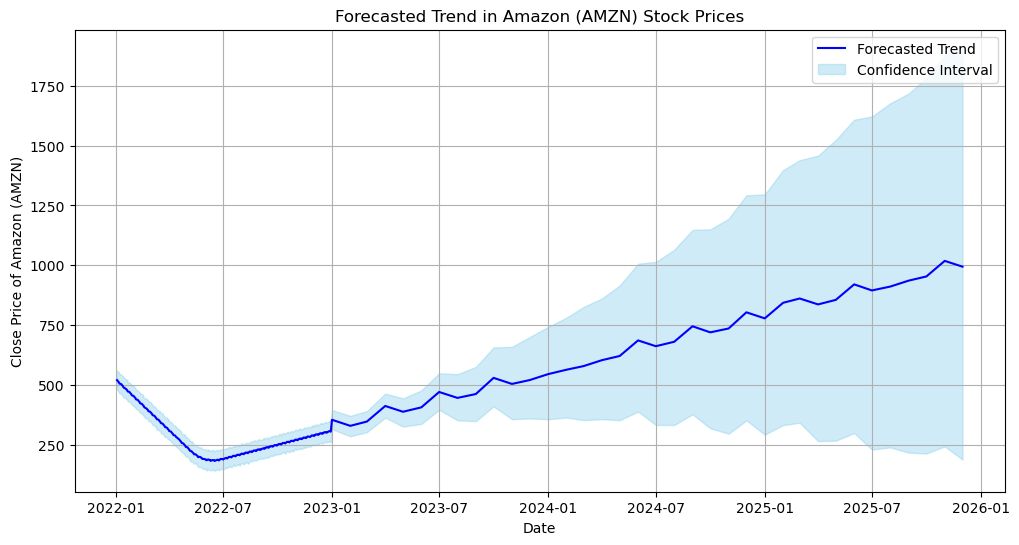

In [131]:
import matplotlib.pyplot as plt

# Plotting the forecasted data
plt.figure(figsize=(12, 6))
plt.plot(forecast_two['ds'], forecast_two['yhat'], color='blue', label='Forecasted Trend')
plt.fill_between(forecast_two['ds'], forecast_two['yhat_lower'], forecast_two['yhat_upper'], color='skyblue', alpha=0.4, label='Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Close Price of Amazon (AMZN)')
plt.title('Forecasted Trend in Amazon (AMZN) Stock Prices')
plt.legend()
plt.grid(True)
plt.show()

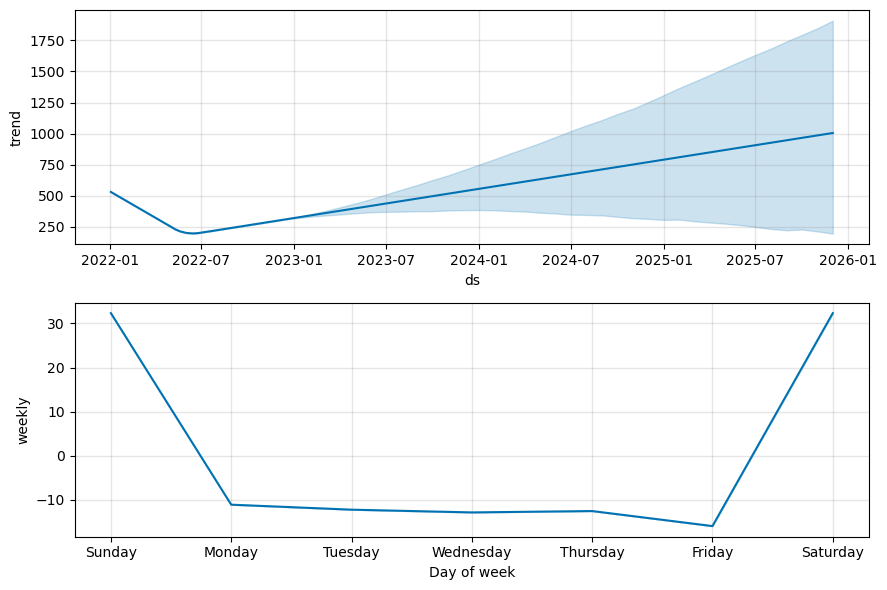

In [133]:
# Plot the components of the forecasted data
fig = amzn_prophet_two.plot_components(forecast_two)

# Model Deployment